# Filter and Reconstruct a Noisy Signal

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.fftpack import fft, ifft, fftshift, ifftshift

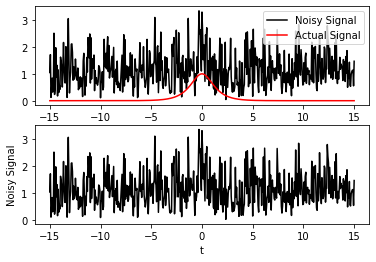

In [2]:
# ******************************************************************************
# Display the noisy signal
# ******************************************************************************
# Construct temporal grid
T = 30
N = 2**9
tt = np.linspace(-T/2.,T/2.,N-1)
t = tt[0:N-1]
# Construct frequency gird
w = N/T
kk = np.linspace(-w/2.,w/2.,N-1)
k = kk[0:N-1]
# Construct signal with noise
u = 1./np.cosh(t)
ut = fft(u);
# Noise amplitude
noise = 20;     # <--- Increase this number to increase the noise
# White noise added to signal
w = noise*(np.random.randn(1,N-1) + 1j*np.random.randn(1,N-1))
utn = ut + w
un = ifft(utn)
# Display results
plt.plot(k,abs(fftshift(utn.T)),'g')
plt.xlabel('$\omega$'); plt.ylabel('Frequency Noise')

plt.subplot(211), plt.plot(t,abs(un.T),'k',t,u,'r')
plt.legend(['Noisy Signal','Actual Signal'])
plt.subplot(212), plt.plot(t,abs(un.T),'k')
plt.xlabel('t'); plt.ylabel('Noisy Signal');

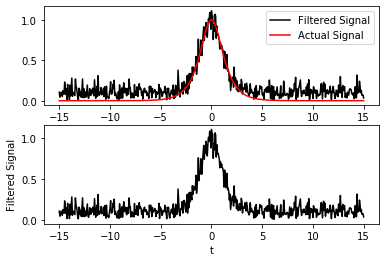

In [3]:
# ******************************************************************************
# Use the fact that the noise is normally distributed with mean 0 and average
# the noise over several random realizations
# ******************************************************************************
# Initialize average and noisy signal
ave = np.zeros((1,N-1)) + 1j*np.zeros((1,N-1))
utn = ave.copy()

# Number of realizations
nr = 100     # <--- Increase this number to increase the filter

# Begin averaging
for i in range(nr):
    utn = ut + noise*(np.random.randn(1,N-1) + 1j*np.random.randn(1,N-1))
    ave += ifft(utn)/nr
    
fs = abs(ave.T)
plt.plot(t,fs,'k',t,u,'r')
plt.xlabel('t'); plt.ylabel('Averaged Noisy Signal')
plt.legend(['Noisy Signal','Actual Signal'])

plt.subplot(211), plt.plot(t,fs,'k',t,u,'r')
plt.legend(['Filtered Signal','Actual Signal'])
plt.subplot(212), plt.plot(t,fs,'k')
plt.xlabel('t'); plt.ylabel('Filtered Signal');